# 객체 탐지

In [1]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
result  = model('sample.png')
result


image 1/1 /home/devuser/workspace/wn7_dl_rep/sample.png: 512x640 3 persons, 197.0ms
Speed: 10.3ms preprocess, 197.0ms inference, 260.7ms postprocess per image at shape (1, 3, 512, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [2]:
# 바운딩박스, 라벨출력
result = model('cat.png')
result[0].boxes[0].conf[0]


image 1/1 /home/devuser/workspace/wn7_dl_rep/cat.png: 416x640 5 cats, 1 bed, 60.5ms
Speed: 6.1ms preprocess, 60.5ms inference, 8.4ms postprocess per image at shape (1, 3, 416, 640)


tensor(0.7126, device='cuda:0')

In [4]:
import cv2
img = cv2.imread('cat.png')
img

array([[[225, 219, 214],
        [225, 219, 214],
        [225, 219, 214],
        ...,
        [212, 207, 206],
        [212, 207, 206],
        [213, 208, 207]],

       [[225, 219, 214],
        [225, 219, 214],
        [225, 219, 214],
        ...,
        [211, 206, 205],
        [212, 207, 206],
        [212, 207, 206]],

       [[225, 219, 214],
        [225, 219, 214],
        [224, 218, 213],
        ...,
        [211, 206, 205],
        [211, 206, 205],
        [212, 207, 206]],

       ...,

       [[251, 246, 245],
        [251, 246, 245],
        [251, 246, 245],
        ...,
        [248, 243, 242],
        [248, 243, 242],
        [248, 243, 242]],

       [[251, 246, 245],
        [251, 246, 245],
        [251, 246, 245],
        ...,
        [248, 243, 242],
        [248, 243, 242],
        [248, 243, 242]],

       [[251, 246, 245],
        [251, 246, 245],
        [251, 246, 245],
        ...,
        [248, 243, 242],
        [248, 243, 242],
        [248, 243, 242]]

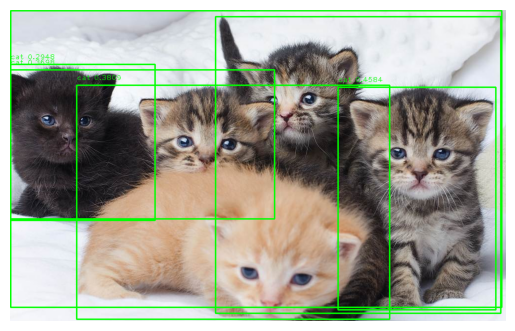

True

In [7]:
import matplotlib.pyplot as plt
import cv2

for box in result[0].boxes:
    class_id = int(box.cls[0])
    class_name = model.names[class_id]
    
    # 신뢰도 점수
    conf = float(box.conf[0])
    
    # 바운딩 박스
    coords = box.xyxy[0].tolist()
    x1, y1, x2, y2 = map(int, coords)
    
    cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
    cv2.putText(img, f'{class_name} {conf:.4f}',
                (x1, y1-10), cv2.FONT_HERSHEY_PLAIN,
                1, (0,255,0), 1)

# BGR → RGB 변환
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")
plt.show()

# 결과 이미지 저장
cv2.imwrite('detect_result.jpg', img)


# segmentation

In [9]:
from ultralytics import YOLO

model = YOLO('yolov8n-seg.pt')
result  = model('car.png')
result[0]


image 1/1 /home/devuser/workspace/wn7_dl_rep/car.png: 384x640 1 bicycle, 10 cars, 1 bus, 8 trucks, 88.1ms
Speed: 4.6ms preprocess, 88.1ms inference, 67.8ms postprocess per image at shape (1, 3, 384, 640)


ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair

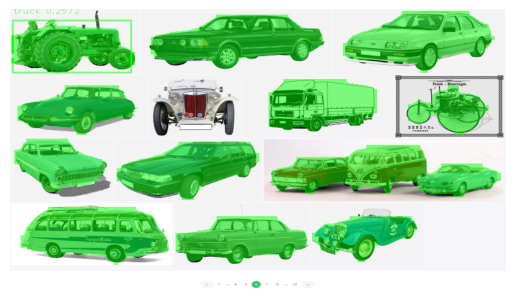

True

In [10]:
import numpy as np

img_new = cv2.imread('car.png')
overlay = img_new.copy() #마스크용


for box, mask in zip(result[0].boxes, result[0].masks):
    #마스크
    polygon = mask.xy[0].astype(np.int32)
    cv2.fillPoly(overlay, [polygon],(0,255,0))
    
    class_id = box.cls[0]
    class_name = model.names[class_id.item()]
    
#신뢰도 점수
conf = float(box.conf[0])

#바운딩 박스
coords = box.xyxy[0].tolist()
x1,y1,x2,y2 = map(int, coords)
cv2.rectangle(img_new, (x1,y1), (x2,y2), (0,255,0), 2)
cv2.putText(img_new, f'{class_name} {conf:.4f}', (x1,y1-10), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,0))

#img + overlay 겹쳐서 출력
alpha = 0.5
final_img = cv2.addWeighted(overlay, alpha, img_new, 1 - alpha, 0)

# 최종출력
plt.imshow(cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
cv2.imwrite('detect_result.jpg', final_img)

# 분류 (생략)
# 자세 (pose)


image 1/1 /home/devuser/workspace/wn7_dl_rep/people.jpg: 416x640 18 persons, 54.0ms
Speed: 4.2ms preprocess, 54.0ms inference, 43.3ms postprocess per image at shape (1, 3, 416, 640)


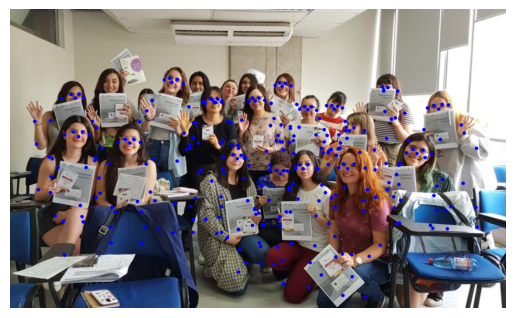

True

In [11]:
pose_model = YOLO('yolov8n-pose.pt')
pose_result = pose_model('people.jpg')
img = cv2.imread('people.jpg')

kp = pose_result[0].keypoints

for man_kp in kp:
    for x,y in man_kp.xy[0]:
        if x>0 and y>0:
            cv2.circle(img, (int(x), int(y)), 3, (255,0,0), -1)
        
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
cv2.imwrite('detect_result.jpg', img)